Algorithme : RANDOMSEARCH-5   
Probleme : f6  
dimension : 2

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

def parse_bbob_file(filepath):
    runs = []
    with open(filepath, 'r') as f:
        content = f.read()

    raw_runs = re.split(r'% function evaluation.+?\n', content)[1:]
    for raw in raw_runs:
        lines = raw.strip().split("\n")
        data = []
        for line in lines:
            if not line.strip() or line.startswith('%'):
                continue
            parts = line.strip().split()
            parts = [float(p.replace("+", "")) for p in parts]
            data.append(parts)
        if not data:
            continue
        df = pd.DataFrame(data)
        dim = df.shape[1] - 5
        df.columns = ['eval', 'noise_free_fitness', 'best_nf_fitness', 'measured_fitness', 'best_measured_fitness'] + [f'x{i+1}' for i in range(dim)]
        runs.append(df)
    return runs

def plot_single_run(run_df, run_index=0, xlim=None):
    plt.figure(figsize=(8, 8))
    plt.plot(run_df['eval'], run_df['best_nf_fitness'], label=f'Run {run_index}')
    plt.xlabel('Nombre d’évaluations (temps)', fontsize=15)
    plt.ylabel('Déviation à l’optimum (qualité)', fontsize=15)
    plt.title(f"Performance du RANDOMSEARCH - Run 1 sur f1 (Dim 2)", fontsize=17)
    plt.grid(True)
    if xlim is not None:
        plt.xlim(xlim)
    plt.legend()
    plt.show()

def plot_all_runs(runs, xlim=None):
    """Affiche toutes les courbes des runs avec labels"""
    plt.figure(figsize=(8, 8))
    for i, run in enumerate(runs):
        plt.plot(run['eval'], run['best_nf_fitness'], label=f'run{i}')
    plt.xlabel('Nombre d’évaluations (temps)', fontsize=15)
    plt.ylabel('Déviation à l’optimum (qualité)', fontsize=15)
    plt.title('Performance du RANDOMSEARCH-5 - 15 Runs sur f1 (Dim 2)', fontsize=17)
    plt.legend(loc='best', fontsize='small', ncol=2)
    plt.grid(True)
    if xlim is not None:
        plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

def plot_aggregated_runs(runs):
    all_curves = []
    max_len = max(len(run) for run in runs)

    for run in runs:
        series = run['best_nf_fitness']
        interpolated = np.interp(np.linspace(0, len(series)-1, max_len), np.arange(len(series)), series)
        all_curves.append(interpolated)

    all_curves = np.array(all_curves)
    mean_curve = np.mean(all_curves, axis=0)
    std_curve = np.std(all_curves, axis=0)
    min_curve = np.min(all_curves, axis=0)
    max_curve = np.max(all_curves, axis=0)

    x = range(max_len)

    plt.figure(figsize=(8, 6))
    plt.plot(x, mean_curve, color='blue', label='Moyenne')
    plt.fill_between(x, min_curve, max_curve, color='lightgray', alpha=0.5, label='Min/Max')
    plt.fill_between(x, mean_curve - std_curve, mean_curve + std_curve, color='orange', alpha=0.4, label='± Écart-type')

    plt.title("Agrégation des runs (Moyenne, Min/Max, Écart-type) - Dim 2", fontsize=17)
    plt.xlabel('Nombre d’évaluations (temps)', fontsize=15)
    plt.ylabel('Déviation à l’optimum (qualité)', fontsize=15)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    filepath = '/content/drive/MyDrive/Projet_de_Recherche_eilco/Algorithme_RANDOMSEARCH-5/data/bbobexp_f6_DIM2_i1.tdat'
    runs = parse_bbob_file(filepath)


**Visualiser et analyser l’exécution d’un run (une instance)**

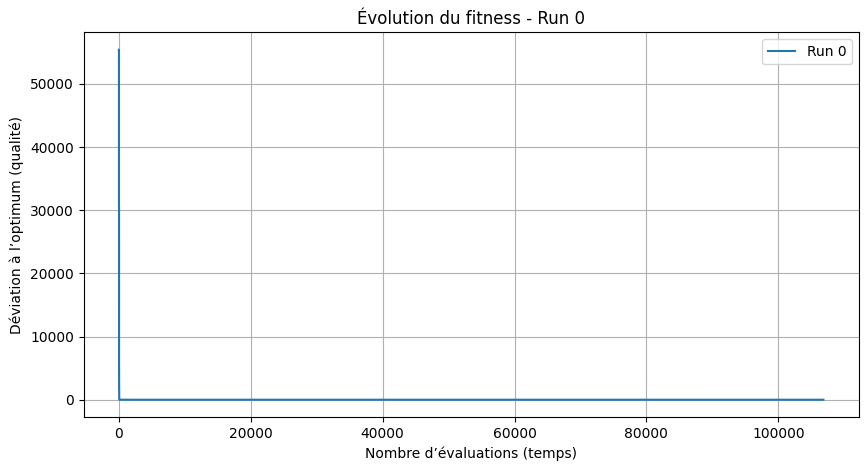

In [ ]:
    plot_single_run(runs[0])

**Visualiser et analyser l’exécution de tous les runs (toutes les instances)**

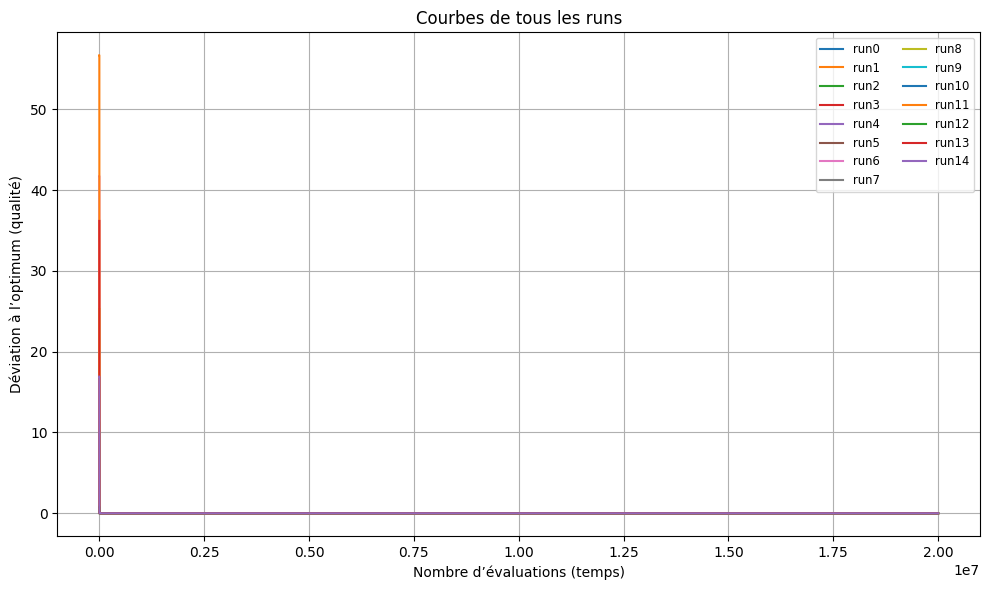

In [ ]:
    plot_all_runs(runs)

**Agrégation des runs (Moyenne, Min/Max et Écart-type)**

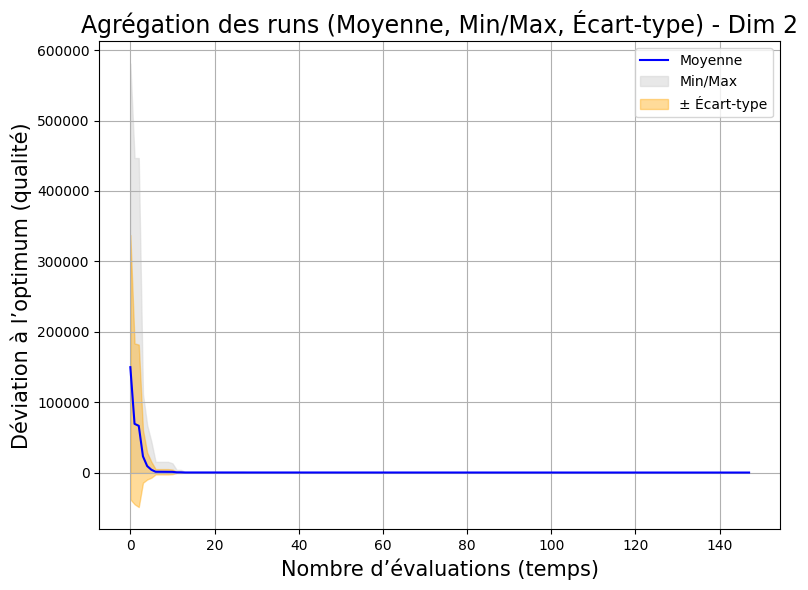

In [ ]:
    plot_aggregated_runs(runs)